Install and import necessary libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [73]:
from sklearn.metrics import mean_absolute_error,  mean_absolute_percentage_error, r2_score

Data Cleaning

In [74]:
def load_yearly_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, sep=';', header=None, 
                     names=['Fractional_Year', 'Sunspots', 'Std_Dev', 'Obs', 'Definitive'])
    
    # Extract the 'Year' as an integer from 'Fractional_Year'
    df['Year'] = df['Fractional_Year'].astype(int)
    
    # Set 'Year' as the index
    df.set_index('Year', inplace=True)
    
    # Convert 'Sunspots' to numeric, replacing any non-numeric values with NaN
    df['Sunspots'] = pd.to_numeric(df['Sunspots'], errors='coerce')
    
    # Remove any rows with NaN sunspot values
    df_cleaned = df[['Sunspots']].dropna()
    
    # Remove any rows with negative sunspot values
    df_cleaned = df_cleaned[df_cleaned['Sunspots'] >= 0]
    
    print("Columns:", df_cleaned.columns)
    print("Data cleaned:")
    print(df_cleaned.head())
    print("\nSummary:")
    print(df_cleaned.describe())
    
    return df_cleaned

# Example usage
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_y_tot_V2.0.csv'
yearly_data = load_yearly_data(file_path)


Columns: Index(['Sunspots'], dtype='object')
Data cleaned:
      Sunspots
Year          
1700       8.3
1701      18.3
1702      26.7
1703      38.3
1704      60.0

Summary:
         Sunspots
count  322.000000
mean    78.365217
std     62.054638
min      0.000000
25%     24.325000
50%     65.150000
75%    115.075000
max    269.300000


Time unit detection 

In [75]:
import pandas as pd
import numpy as np

def determine_time_unit(data):
    if isinstance(data, pd.DataFrame) and 'Fractional_Year' in data.columns:
        year_column = data['Fractional_Year']
    elif isinstance(data, pd.Series):
        year_column = data
    else:
        raise ValueError("Input must be a pandas DataFrame with a 'Fractional_Year' column or a Series")

    # Calculate time differences
    time_diff = year_column.diff().dropna()
    
    # Determine the time unit based on the median time difference
    median_diff = np.median(time_diff)
    
    if np.isclose(median_diff, 1, atol=1e-2):
        return 'yearly'
    elif np.isclose(median_diff, 1/12, atol=1e-2):
        return 'monthly'
    elif np.isclose(median_diff, 1/365.25, atol=1e-3):
        return 'daily'
    else:
        return 'irregular'

# Read the CSV file
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_y_tot_V2.0.csv'
data = pd.read_csv(file_path, sep=';', header=None, names=['Fractional_Year', 'Sunspots', 'Std_Dev', 'Obs', 'Definitive'])

time_unit = determine_time_unit(data)
print(f"The time series is {time_unit}")

# Convert to yearly dataset
data['Year'] = data['Fractional_Year'].astype(int)
yearly_data = data.groupby('Year').mean().reset_index()

yearly_time_unit = determine_time_unit(yearly_data['Year'])
print(f"The converted time series is {yearly_time_unit}")

# Display the first few rows of the yearly dataset
print(yearly_data.head())

The time series is yearly
The converted time series is yearly
   Year  Fractional_Year  Sunspots  Std_Dev  Obs  Definitive
0  1700           1700.5       8.3     -1.0 -1.0         1.0
1  1701           1701.5      18.3     -1.0 -1.0         1.0
2  1702           1702.5      26.7     -1.0 -1.0         1.0
3  1703           1703.5      38.3     -1.0 -1.0         1.0
4  1704           1704.5      60.0     -1.0 -1.0         1.0


 train your model into the future

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


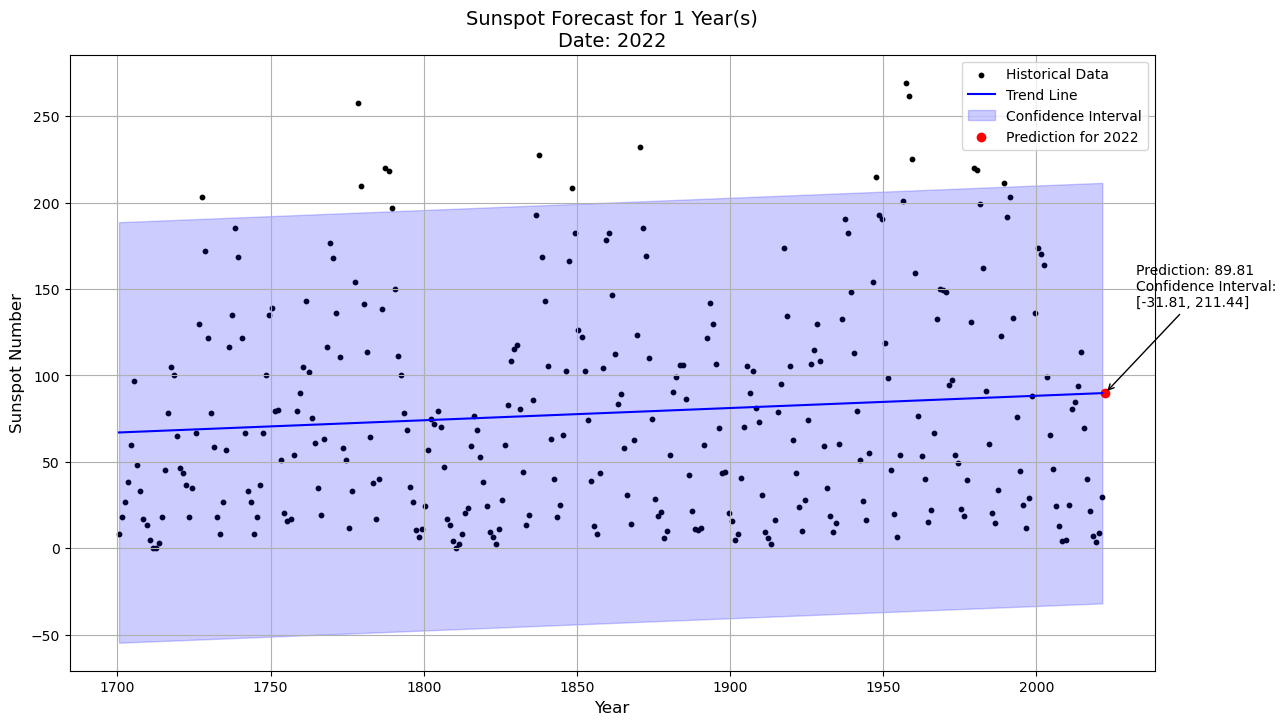

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


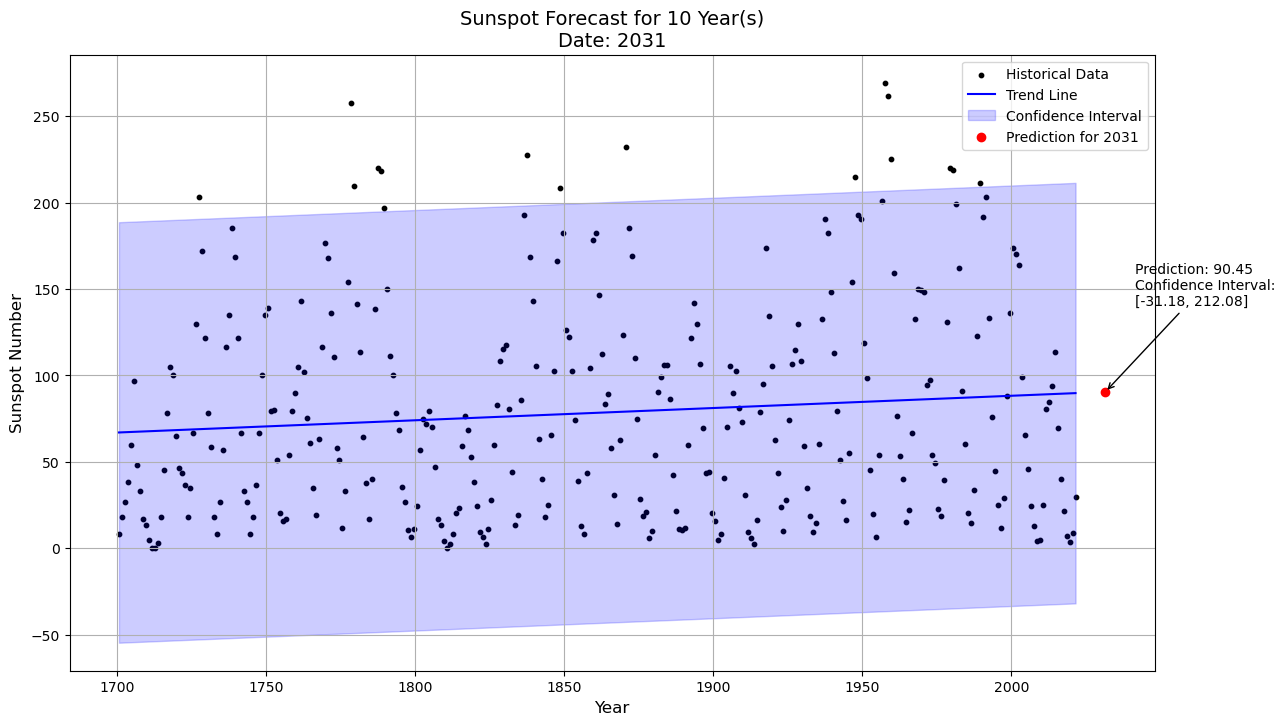

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\harin\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


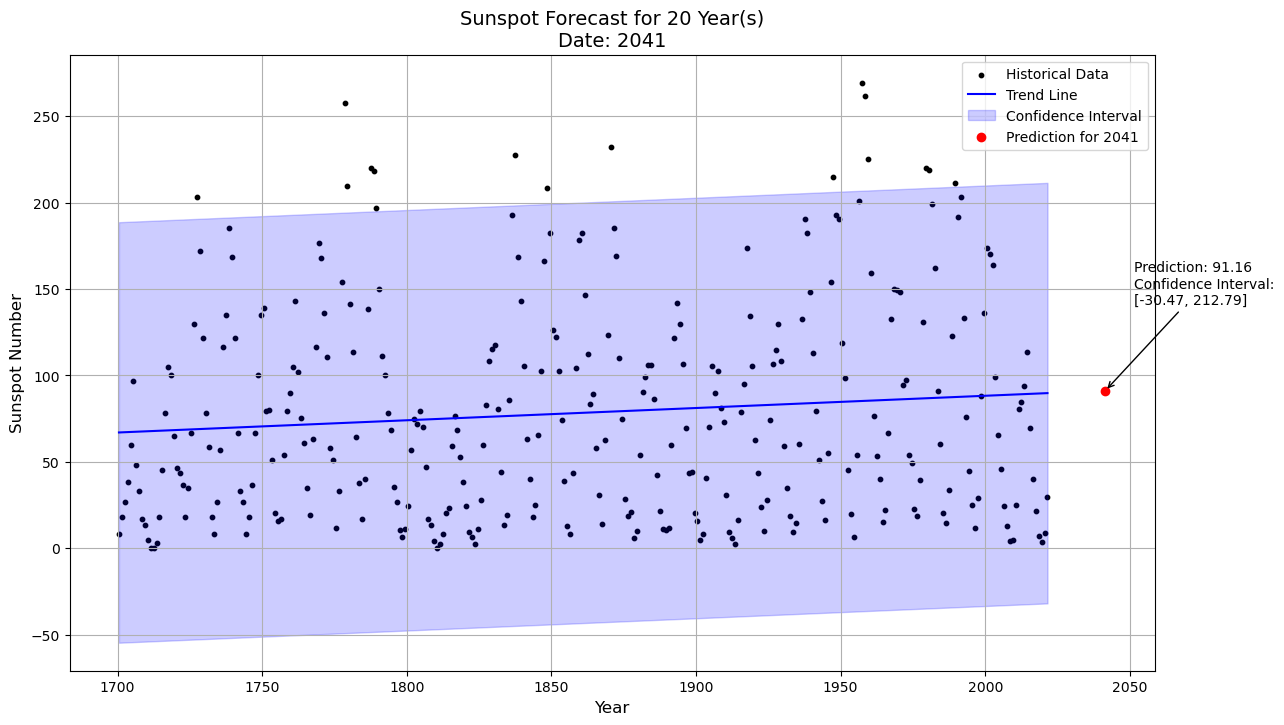

In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_y_tot_V2.0.csv'
dataset = pd.read_csv(file_path, header=None, names=['Year', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Convert Year and Sunspots to float
dataset['Year'] = dataset['Year'].astype(float)
dataset['Sunspots'] = dataset['Sunspots'].astype(float)

# Prepare the data
X = dataset[['Year']].values
y = dataset['Sunspots'].values

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get the last year in the dataset
last_year = dataset['Year'].max()

# Function to predict and plot for future years
def predict_and_plot(years_ahead):
    future_year = last_year + years_ahead
    future_prediction = model.predict([[future_year]])[0]

    # Confidence interval
    std_dev = dataset['Sunspots'].std()
    lower_bound = future_prediction - 1.96 * std_dev
    upper_bound = future_prediction + 1.96 * std_dev

    # Plotting
    plt.figure(figsize=(14, 8))
    
    # Scatter plot of historical data
    plt.scatter(dataset['Year'], dataset['Sunspots'], color='black', s=10, label='Historical Data')
    
    # Regression line for the historical data
    plt.plot(dataset['Year'], model.predict(dataset[['Year']]), color='blue', label='Trend Line')
    
    # Confidence interval
    plt.fill_between(
        dataset['Year'], 
        model.predict(dataset[['Year']]) - 1.96 * std_dev, 
        model.predict(dataset[['Year']]) + 1.96 * std_dev, 
        color='blue', alpha=0.2, label='Confidence Interval'
    )
    
    # Future prediction point
    plt.scatter([future_year], [future_prediction], color='red', label=f'Prediction for {int(future_year)}')
    
    # Annotate future prediction
    plt.annotate(
        f"Prediction: {future_prediction:.2f}\nConfidence Interval:\n[{lower_bound:.2f}, {upper_bound:.2f}]",
        (future_year, future_prediction),
        xytext=(future_year + 10, future_prediction + 50),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=10
    )
    
    # Title and labels
    plt.title(f"Sunspot Forecast for {years_ahead} Year(s)\nDate: {int(future_year)}", fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Sunspot Number', fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.show()

# Generate predictions and plot
predict_and_plot(1)
predict_and_plot(10)
predict_and_plot(20)

Model tuning - Forecasting growth

16:17:32 - cmdstanpy - INFO - Chain [1] start processing
16:17:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


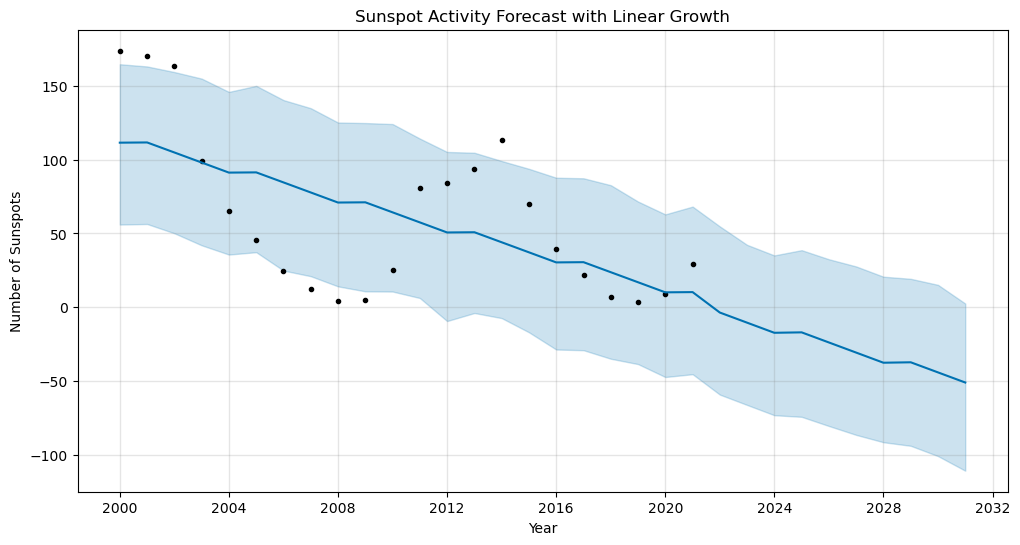

16:17:33 - cmdstanpy - INFO - Chain [1] start processing
16:17:39 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


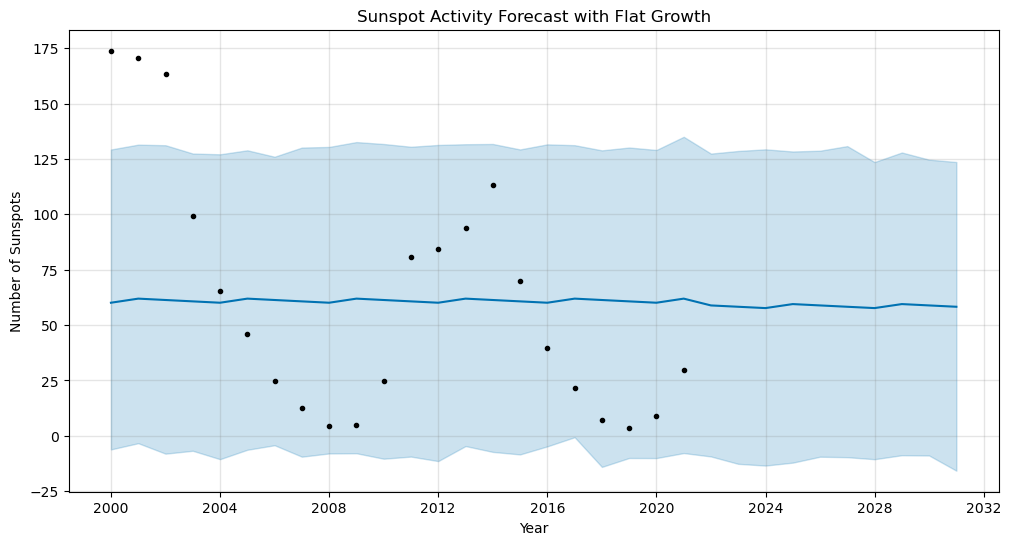

16:17:40 - cmdstanpy - INFO - Chain [1] start processing
16:17:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


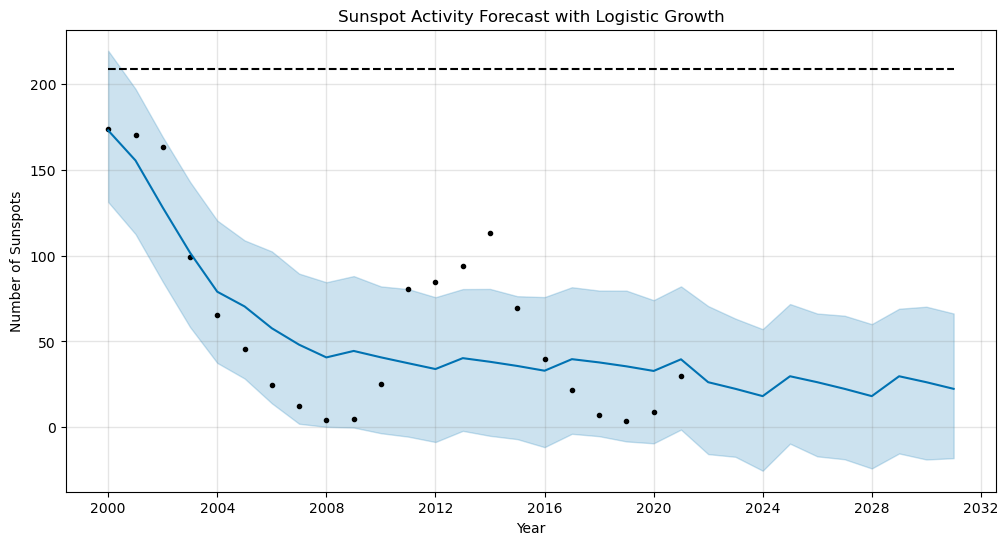

Linear Growth Forecast:
           ds       yhat
27 2026-12-31 -30.775677
28 2027-12-31 -37.644430
29 2028-12-31 -37.353867
30 2029-12-31 -44.208022
31 2030-12-31 -51.070506

Flat Growth Forecast:
           ds       yhat
27 2026-12-31  58.270916
28 2027-12-31  57.673712
29 2028-12-31  59.481038
30 2029-12-31  58.873578
31 2030-12-31  58.270916

Logistic Growth Forecast:
           ds       yhat
27 2026-12-31  22.345480
28 2027-12-31  18.086931
29 2028-12-31  29.690120
30 2029-12-31  26.214585
31 2030-12-31  22.344887


In [77]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_y_tot_V2.0.csv', header=None, names=['Year', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Filter the dataset to include only data from the year 2000 onwards
dataset_filtered = dataset[dataset['Year'] >= 2000]

# Prepare the data for FBProphet
df = dataset_filtered.copy()
df['ds'] = pd.to_datetime(df['Year'].astype(int), format='%Y')
df['y'] = df['Sunspots']
df = df[['ds', 'y']]

# Function to create and plot forecast
def create_forecast(growth_type, periods=10, cap=None):
    if growth_type == 'logistic':
        df['cap'] = cap
        m = Prophet(growth='logistic')
    else:
        m = Prophet(growth=growth_type)
    
    m.fit(df)
    
    future = m.make_future_dataframe(periods=periods, freq='Y')
    if growth_type == 'logistic':
        future['cap'] = cap
    
    forecast = m.predict(future)
    
    fig = plt.figure(figsize=(12, 6))
    m.plot(forecast, ax=plt.gca())
    plt.title(f'Sunspot Activity Forecast with {growth_type.capitalize()} Growth')
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.show()
    
    return forecast

# Create forecasts for different growth types
linear_forecast = create_forecast('linear')
flat_forecast = create_forecast('flat')
logistic_forecast = create_forecast('logistic', cap=df['y'].max() * 1.2)

# Print the last 5 years of each forecast
print("Linear Growth Forecast:")
print(linear_forecast[['ds', 'yhat']].tail())
print("\nFlat Growth Forecast:")
print(flat_forecast[['ds', 'yhat']].tail())
print("\nLogistic Growth Forecast:")
print(logistic_forecast[['ds', 'yhat']].tail())


Seasonality

16:17:47 - cmdstanpy - INFO - Chain [1] start processing
16:17:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

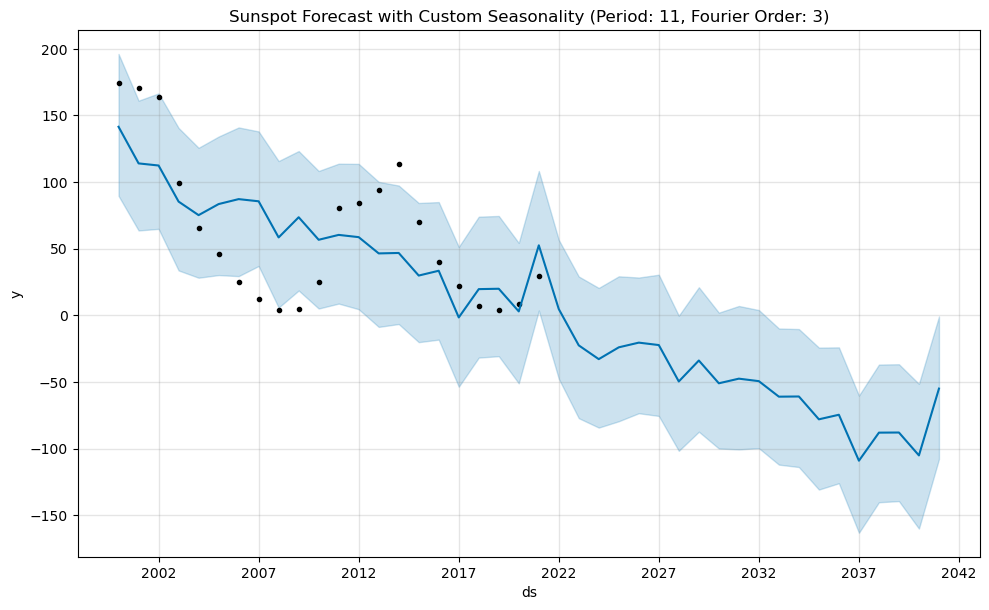

16:17:47 - cmdstanpy - INFO - Chain [1] start processing
16:17:47 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 11, Fourier Order: 3
           ds        yhat
37 2036-12-31 -109.078843
38 2037-12-31  -88.032422
39 2038-12-31  -87.937371
40 2039-12-31 -105.118263
41 2040-12-31  -54.980818


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

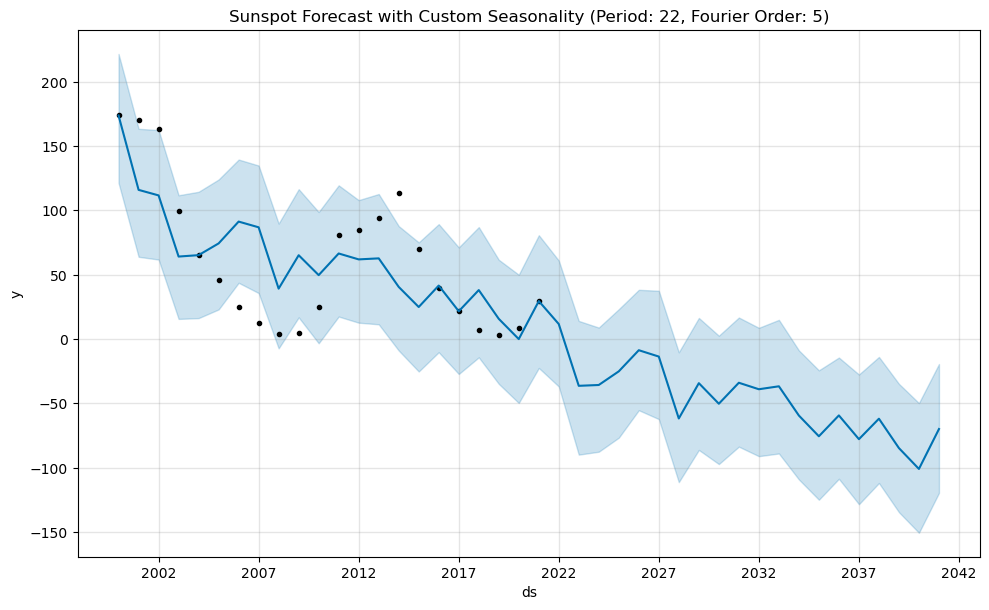

16:17:48 - cmdstanpy - INFO - Chain [1] start processing
16:17:48 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Period: 22, Fourier Order: 5
           ds        yhat
37 2036-12-31  -77.734209
38 2037-12-31  -61.815542
39 2038-12-31  -84.659313
40 2039-12-31 -100.859460
41 2040-12-31  -69.837666


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

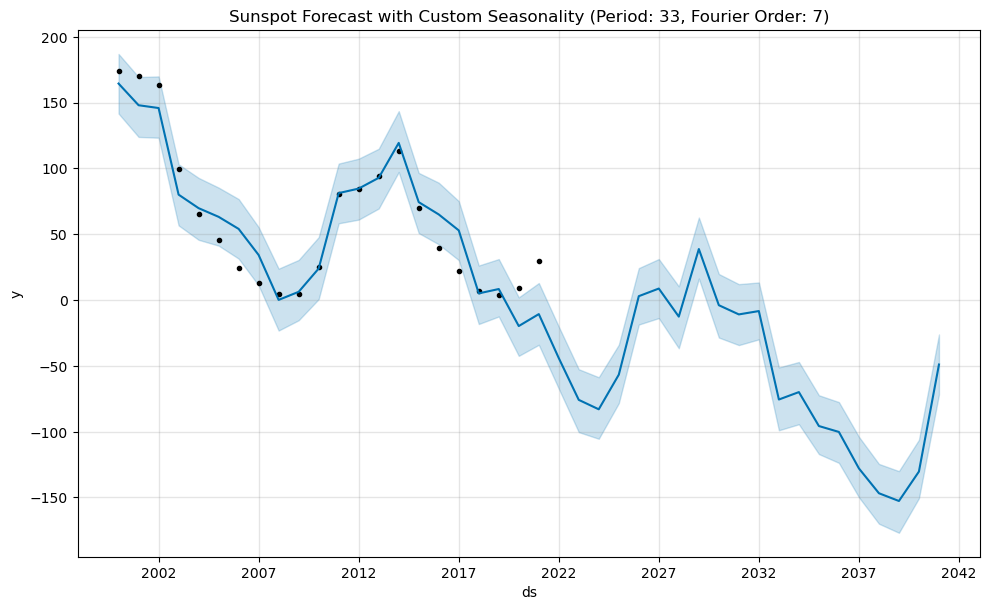

16:17:49 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Period: 33, Fourier Order: 7
           ds        yhat
37 2036-12-31 -127.939230
38 2037-12-31 -146.777949
39 2038-12-31 -152.660234
40 2039-12-31 -130.300596
41 2040-12-31  -48.977616


16:17:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

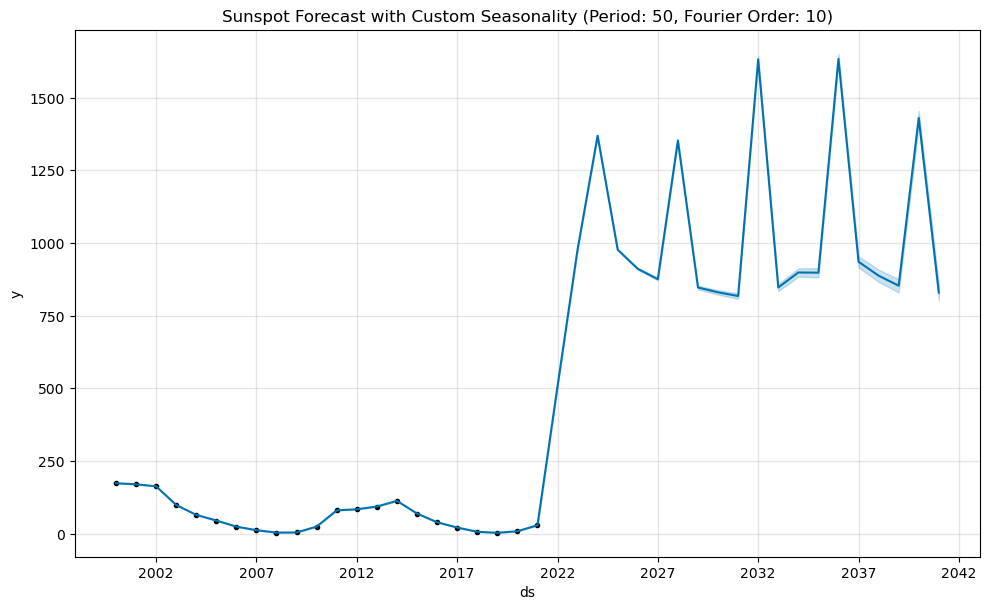

16:17:52 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Period: 50, Fourier Order: 10
           ds         yhat
37 2036-12-31   936.044407
38 2037-12-31   888.154583
39 2038-12-31   853.710415
40 2039-12-31  1430.542480
41 2040-12-31   829.743958


16:17:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

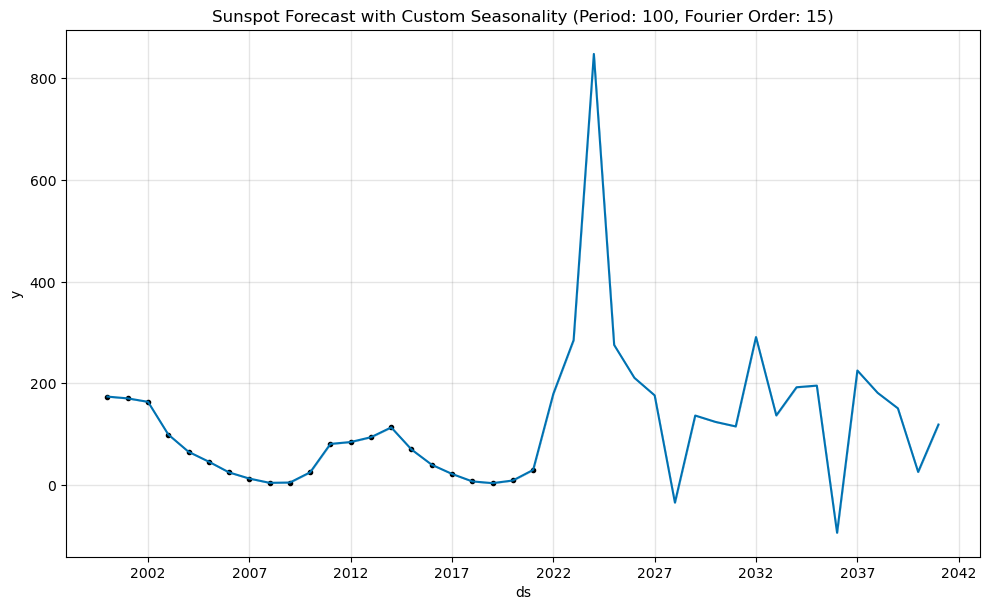


Forecast for Period: 100, Fourier Order: 15
           ds        yhat
37 2036-12-31  225.235849
38 2037-12-31  181.309260
39 2038-12-31  150.824523
40 2039-12-31   25.633383
41 2040-12-31  118.936937


In [78]:
# Function to create forecast with custom seasonality
def create_forecast_with_seasonality(period, fourier_order):
    m = Prophet()
    m.add_seasonality(name=f'custom_{period}', period=period, fourier_order=fourier_order)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=20, freq='Y')
    forecast = m.predict(future)
    
    plt.figure(figsize=(12, 6))
    m.plot(forecast)
    plt.title(f'Sunspot Forecast with Custom Seasonality (Period: {period}, Fourier Order: {fourier_order})')
    plt.show()
    
    return forecast

# Test different combinations
period_fourier_combinations = [
    (11, 3),  # Approximately one solar cycle
    (22, 5),  # Approximately two solar cycles
    (33, 7),  # Approximately three solar cycles
    (50, 10), # Longer-term cycle
    (100, 15) # Very long-term cycle
]

for period, fourier_order in period_fourier_combinations:
    forecast = create_forecast_with_seasonality(period, fourier_order)
    print(f"\nForecast for Period: {period}, Fourier Order: {fourier_order}")
    print(forecast[['ds', 'yhat']].tail())

Trend changepoints

16:17:54 - cmdstanpy - INFO - Chain [1] start processing
16:17:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

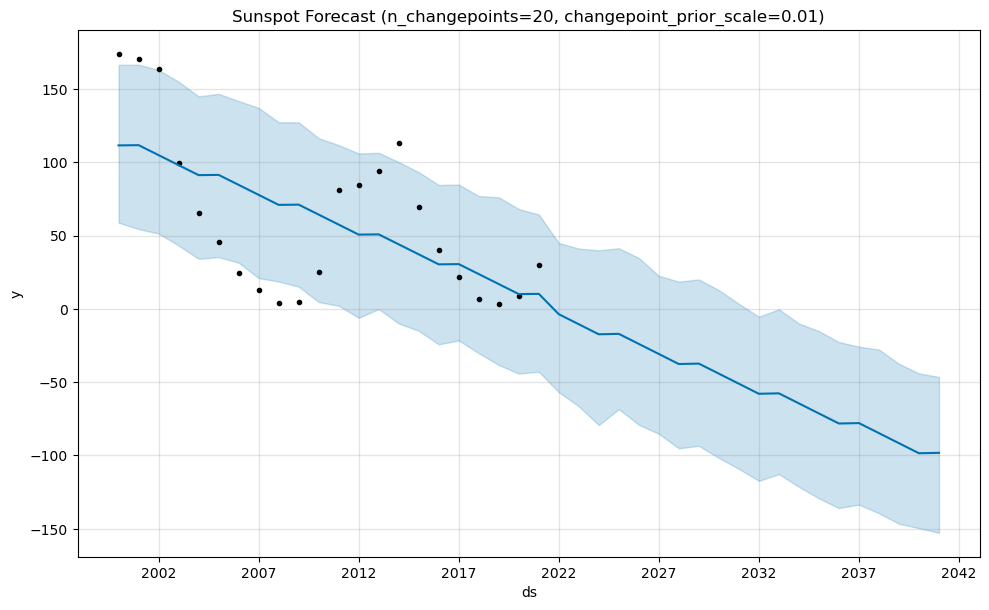

16:17:54 - cmdstanpy - INFO - Chain [1] start processing
16:17:55 - cmdstanpy - INFO - Chain [1] done processing



Forecast for n_changepoints=20, changepoint_prior_scale=0.01
           ds       yhat
37 2036-12-31 -77.942787
38 2037-12-31 -84.796468
39 2038-12-31 -91.658360
40 2039-12-31 -98.526402
41 2040-12-31 -98.232482


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

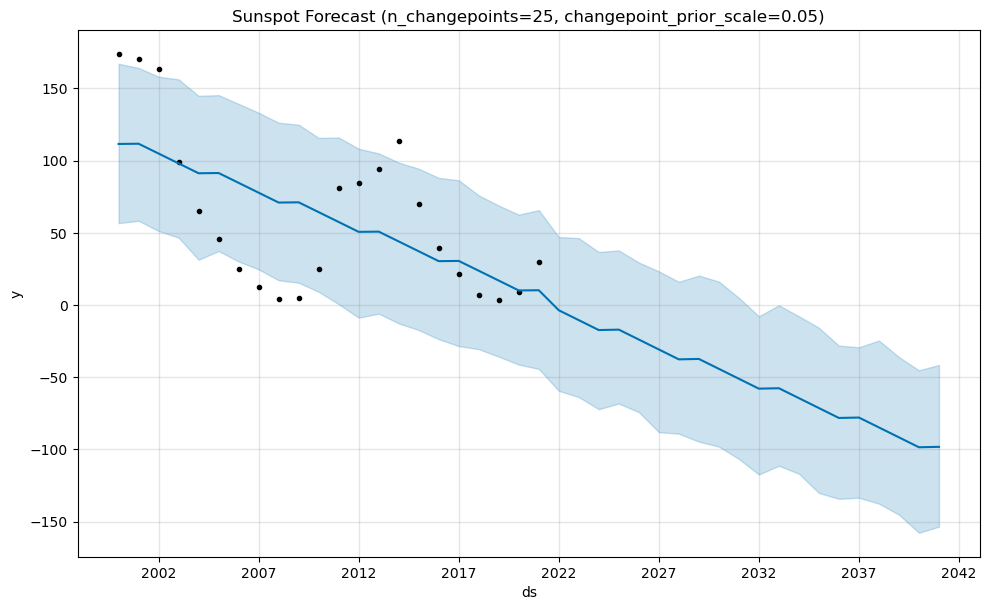

16:17:55 - cmdstanpy - INFO - Chain [1] start processing
16:17:55 - cmdstanpy - INFO - Chain [1] done processing



Forecast for n_changepoints=25, changepoint_prior_scale=0.05
           ds       yhat
37 2036-12-31 -77.943524
38 2037-12-31 -84.797679
39 2038-12-31 -91.660163
40 2039-12-31 -98.528916
41 2040-12-31 -98.238352


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

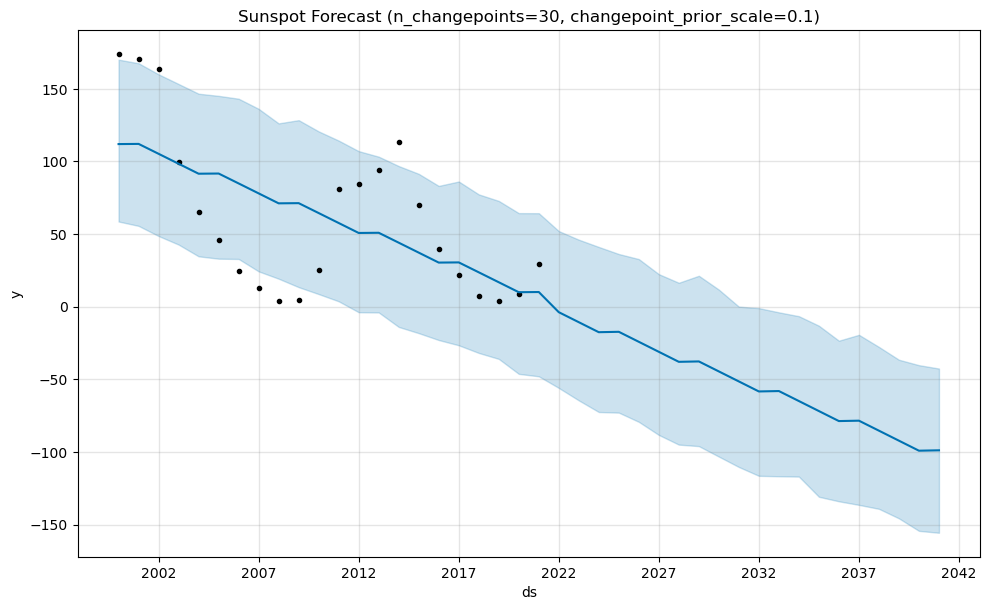

16:17:56 - cmdstanpy - INFO - Chain [1] start processing
16:17:56 - cmdstanpy - INFO - Chain [1] done processing



Forecast for n_changepoints=30, changepoint_prior_scale=0.1
           ds       yhat
37 2036-12-31 -78.512677
38 2037-12-31 -85.390317
39 2038-12-31 -92.276981
40 2039-12-31 -99.170607
41 2040-12-31 -98.902230


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

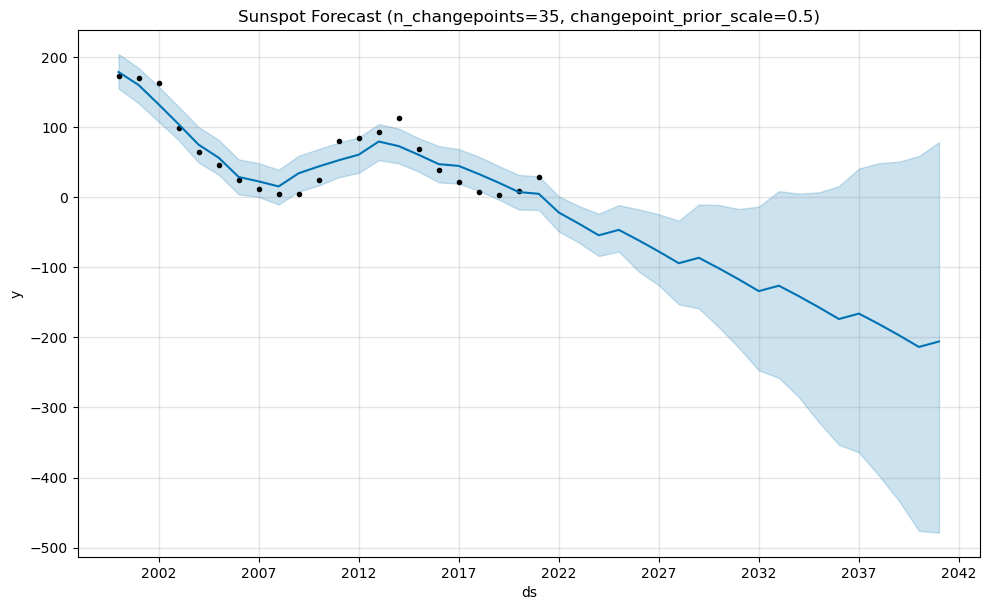

16:17:56 - cmdstanpy - INFO - Chain [1] start processing



Forecast for n_changepoints=35, changepoint_prior_scale=0.5
           ds        yhat
37 2036-12-31 -165.937029
38 2037-12-31 -180.959082
39 2038-12-31 -196.831076
40 2039-12-31 -213.544209
41 2040-12-31 -205.787985


16:17:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


<Figure size 1200x600 with 0 Axes>

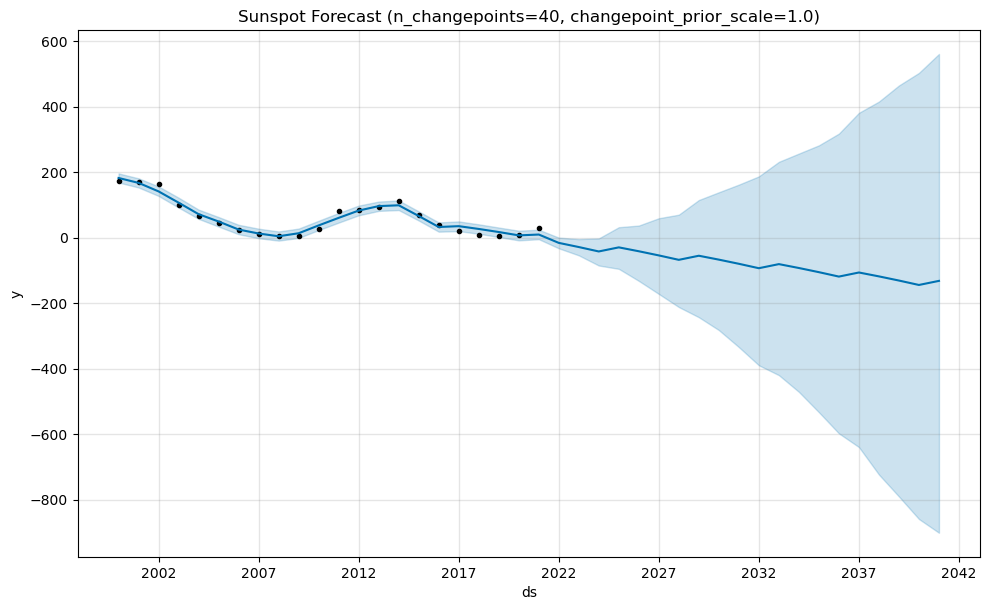


Forecast for n_changepoints=40, changepoint_prior_scale=1.0
           ds        yhat
37 2036-12-31 -106.441278
38 2037-12-31 -118.317900
39 2038-12-31 -131.015193
40 2039-12-31 -144.523974
41 2040-12-31 -132.021664


In [79]:
def create_forecast_with_changepoints(n_changepoints, changepoint_prior_scale):
    m = Prophet(n_changepoints=n_changepoints, changepoint_prior_scale=changepoint_prior_scale)
    m.fit(df)
    
    future = m.make_future_dataframe(periods=20, freq='Y')
    forecast = m.predict(future)
    
    fig = plt.figure(figsize=(12, 6))
    m.plot(forecast)
    plt.title(f'Sunspot Forecast (n_changepoints={n_changepoints}, changepoint_prior_scale={changepoint_prior_scale})')
    plt.show()
    
    return forecast

# Test different combinations
changepoint_combinations = [
    (20, 0.01),
    (25, 0.05),
    (30, 0.1),
    (35, 0.5),
    (40, 1.0)
]

for n_changepoints, changepoint_prior_scale in changepoint_combinations:
    forecast = create_forecast_with_changepoints(n_changepoints, changepoint_prior_scale)
    print(f"\nForecast for n_changepoints={n_changepoints}, changepoint_prior_scale={changepoint_prior_scale}")
    print(forecast[['ds', 'yhat']].tail())

Evaluate all models by providing their respective MAE (Mean Absolute Error) and MAPE (Mean 
Absolute Percentage Error), as well as R2

16:17:58 - cmdstanpy - INFO - Chain [1] start processing
16:17:58 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 1: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive'}


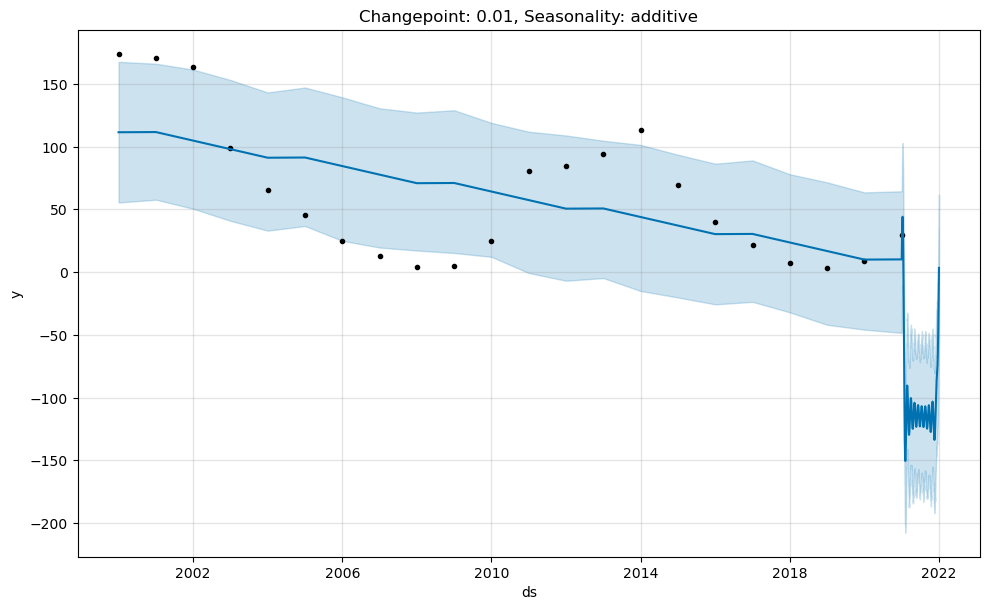

16:17:58 - cmdstanpy - INFO - Chain [1] start processing
16:17:58 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 2: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


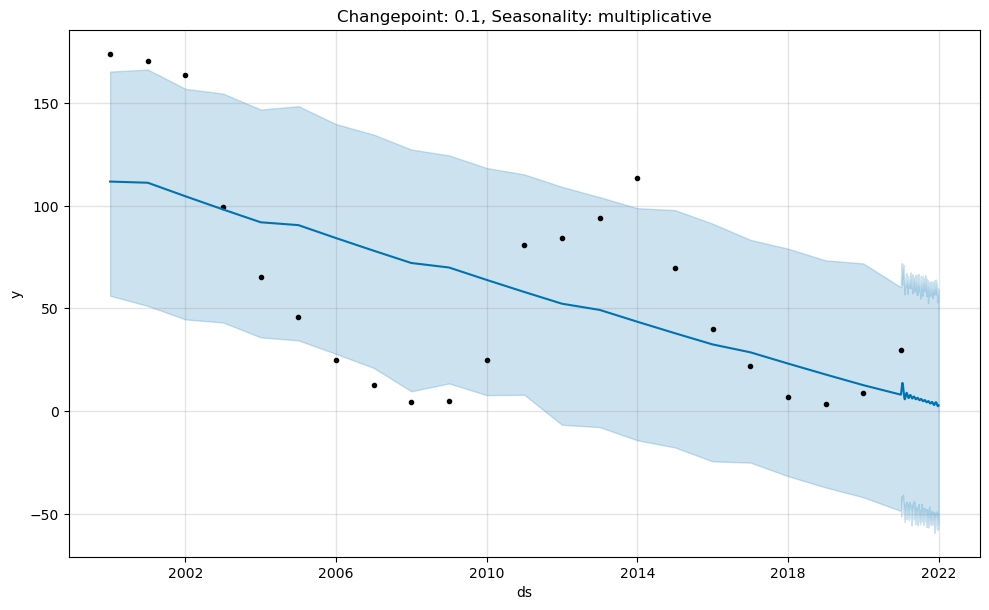

16:17:59 - cmdstanpy - INFO - Chain [1] start processing
16:17:59 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 3: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'}


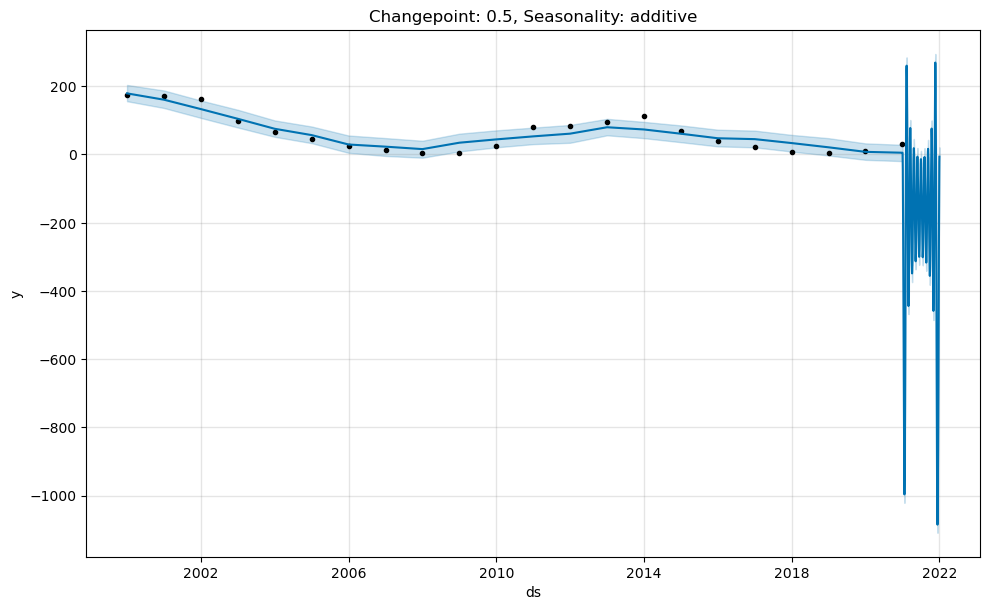

16:18:00 - cmdstanpy - INFO - Chain [1] start processing
16:18:00 - cmdstanpy - INFO - Chain [1] done processing


Evaluating Test Case 4: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'}


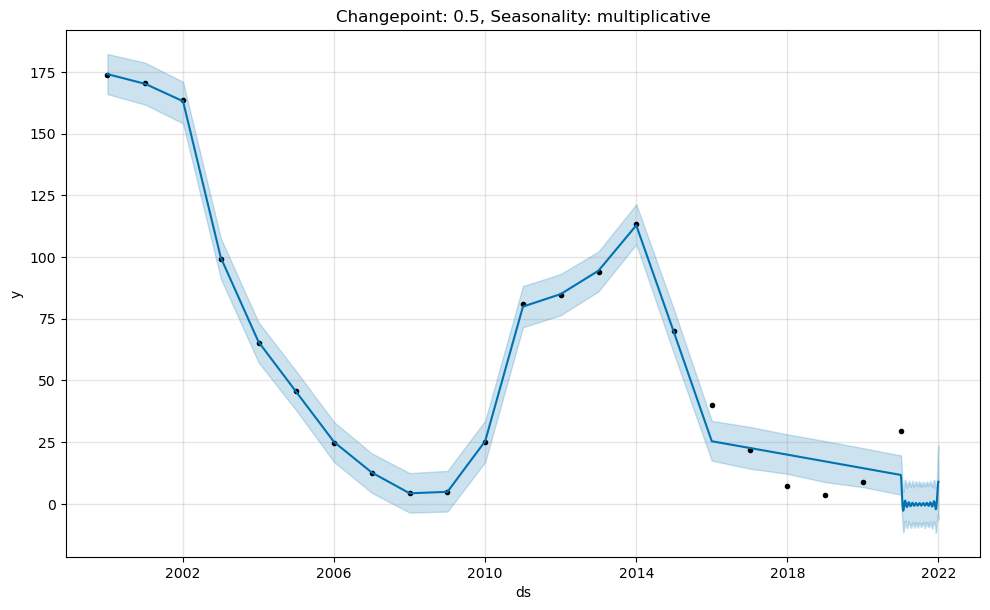


Test Case 1 Results:
MAE: 37.33
MAPE: 232.22%
R²: 0.3515

Test Case 2 Results:
MAE: 37.34
MAPE: 233.98%
R²: 0.3506

Test Case 3 Results:
MAE: 16.45
MAPE: 106.66%
R²: 0.8735

Test Case 4 Results:
MAE: 3.22
MAPE: 33.32%
R²: 0.9859


In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 3/SN_y_tot_V2.0.csv'  # Replace with your dataset path
dataset = pd.read_csv(file_path, header=None, names=['Year', 'Sunspots', 'StdDev', 'Observations', 'Indicator'], sep=';')

# Restrict dataset to reasonable year range
dataset = dataset[(dataset['Year'] >= 2000)]

# Prepare the dataset for Prophet
dataset['ds'] = pd.to_datetime(dataset['Year'], format='%Y', errors='coerce')  # Prophet requires a datetime column
dataset['y'] = dataset['Sunspots']
dataset = dataset.dropna(subset=['ds', 'y'])  # Drop rows with invalid dates or missing values
dataset = dataset[['ds', 'y']]

# Define test cases with changepoint and seasonality settings
test_cases = [
    {"changepoint_prior_scale": 0.01, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.1, "seasonality_mode": "multiplicative"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "additive"},
    {"changepoint_prior_scale": 0.5, "seasonality_mode": "multiplicative"},
]

# Function to evaluate a Prophet model
def evaluate_prophet_model(params, dataset):
    # Initialize and fit the model with parameters
    model = Prophet(
        changepoint_prior_scale=params["changepoint_prior_scale"],
        seasonality_mode=params["seasonality_mode"]
    )
    model.fit(dataset)

    # Make future dataframe (1 year ahead for prediction)
    future = model.make_future_dataframe(periods=365, freq='D')
    forecast = model.predict(future)

    # Split predictions into actuals and forecasts
    forecast_actuals = forecast[forecast['ds'] <= dataset['ds'].max()]
    forecast_future = forecast[forecast['ds'] > dataset['ds'].max()]

    # Calculate evaluation metrics on historical data
    y_true = dataset['y'].values
    y_pred = forecast_actuals['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)

    # Plot results
    model.plot(forecast)
    plt.title(f"Changepoint: {params['changepoint_prior_scale']}, Seasonality: {params['seasonality_mode']}")
    plt.show()

    return {"MAE": mae, "MAPE": mape, "R²": r2, "future_forecast": forecast_future[['ds', 'yhat']]}

# Evaluate all test cases
results = {}
for i, params in enumerate(test_cases):
    print(f"Evaluating Test Case {i + 1}: {params}")
    results[f"Test Case {i + 1}"] = evaluate_prophet_model(params, dataset)

# Display results
for key, metrics in results.items():
    print(f"\n{key} Results:")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MAPE: {metrics['MAPE']:.2f}%")
    print(f"R²: {metrics['R²']:.4f}")


In [82]:
# Simulated yearly data (starting from 2000)
yearly_data = pd.DataFrame({
    'ds': pd.date_range(start='2000-01-01', periods=20, freq='Y'),  # Yearly frequency
    'y': [10 + 0.5 * i + np.sin(2 * np.pi * i / 10) for i in range(20)]  # Simulated yearly data
})

# Split into train/test sets (train for 16 years, test for the last 4 years)
train = yearly_data.iloc[:-4]
test = yearly_data.iloc[-4:]

# Train a Prophet model
model = Prophet()
model.fit(train)

# Make future predictions (forecasting for the next 4 years)
future = model.make_future_dataframe(periods=4, freq='Y')  # Yearly forecasting
forecast = model.predict(future)

# Extract predicted values for the test set
predicted = forecast.iloc[-4:]['yhat']
actual = test['y']

# Evaluate using MAE, MAPE, and R²
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Output the evaluation results
print(f"Model Evaluation for Yearly Forecasting:")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
print(f"R²: {r2:.2f}")



C:\Users\harin\AppData\Local\Temp\ipykernel_10896\1135583846.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'ds': pd.date_range(start='2000-01-01', periods=20, freq='Y'),  # Yearly frequency
17:07:05 - cmdstanpy - INFO - Chain [1] start processing
17:07:05 - cmdstanpy - INFO - Chain [1] done processing


Model Evaluation for Yearly Forecasting:
MAE: 0.97
MAPE: 5.43%
R²: -1.87


C:\Users\harin\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
